<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/21Apr20_lab_datetimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DateTimes Lab

## Introduction
In the previous lesson we learned how to handle DateTime features in Pandas. We can create a variety of different features using dates, and in this lab we will practice some of those methods.

In the cells below, populate a dataframe with the following columns from `house_data.csv`: 'date' (the sell date), 'yr_built' (original build date), and 'yr_renovated' (renovation date).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = "https://raw.githubusercontent.com/jigsawlabs-student/feature-engineering/master/6-datetimes-lab/house_data.csv"
df = pd.read_csv(url, index_col = 0)

In [0]:

df[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now use info to look at the null values and datatypes of the columns.

In [0]:
# use info here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  int64  
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

### Missing Value Analysis

Our first step would be to look for missing values across our features, and see how we can clean them up.  We'll skip this for now, so that we can focus on our datetime features.

### Working with our Features

Our dataframe contains three date features: Date, Year Built, and Year Renovated.  In terms of creating multiple features, the `Date` column will have the most information to unpack.  Let's start there.

The first step is select our `date` column, and try converting it to a datetime.

In [0]:
date_col = df.date

In [0]:
date_col[:2]
# 0    20141013T000000
# 1    20141209T000000
# Name: date, dtype: object

0    20141013T000000
1    20141209T000000
Name: date, dtype: object

> Convert this column to a datetime.

In [0]:
date_col_as_dt = pd.to_datetime(df.date)

In [0]:
date_col_as_dt[:2]
# 0   2014-10-13
# 1   2014-12-09
# Name: date, dtype: datetime64[ns]

0   2014-10-13
1   2014-12-09
Name: date, dtype: datetime64[ns]

Ok, now let's drop the the original date column, and add the formatted version as `sale_date`.

In [0]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
df = df.drop(columns=['date'])


In [0]:
df['sale_date'] = date_col_as_dt

In [0]:
df['sale_date'][:3]

# 0   2014-10-13
# 1   2014-12-09
# 2   2015-02-25
# Name: sale_date, dtype: datetime64[ns]

0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: sale_date, dtype: datetime64[ns]

Ok, now let's use `add_datepart` to extract multiple features from this column.

In [0]:
import numpy as np
import re
def add_datepart(df, fldname, drop=True, time=False, errors="raise"):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

Use add datepart on our dataframe on the sale_date column.

In [0]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_date'],
      dtype='object')

In [0]:
add_datepart(df, 'sale_date')

> Then check the resulting columns.

In [0]:
df[:2]
# 	id	price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	waterfront	view	condition	...	sale_Day	sale_Dayofweek	sale_Dayofyear	sale_Is_month_end	sale_Is_month_start	sale_Is_quarter_end	sale_Is_quarter_start	sale_Is_year_end	sale_Is_year_start	sale_Elapsed
# 0	7129300520	221900.0	3	1.00	1180	5650	1.0	0	0	3	...	13	0	286	False	False	False	False	False	False	1413158400
# 1	6414100192	538000.0	3	2.25	2570	7242	2.0	0	0	3	...	9	1	343	False	False	False	False	False	False	1418083200

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_Year,sale_Month,sale_Week,sale_Day,sale_Dayofweek,sale_Dayofyear,sale_Is_month_end,sale_Is_month_start,sale_Is_quarter_end,sale_Is_quarter_start,sale_Is_year_end,sale_Is_year_start,sale_Elapsed
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,42,13,0,286,False,False,False,False,False,False,1413158400
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,50,9,1,343,False,False,False,False,False,False,1418083200


In [0]:
df.columns
# Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15', 'sale_Year', 'sale_Month', 'sale_Week',
#        'sale_Day', 'sale_Dayofweek', 'sale_Dayofyear', 'sale_Is_month_end',
#        'sale_Is_month_start', 'sale_Is_quarter_end', 'sale_Is_quarter_start',
#        'sale_Is_year_end', 'sale_Is_year_start', 'sale_Elapsed'],
#       dtype='object')

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_Year', 'sale_Month', 'sale_Week',
       'sale_Day', 'sale_Dayofweek', 'sale_Dayofyear', 'sale_Is_month_end',
       'sale_Is_month_start', 'sale_Is_quarter_end', 'sale_Is_quarter_start',
       'sale_Is_year_end', 'sale_Is_year_start', 'sale_Elapsed'],
      dtype='object')

### Working with Multiple Dates

In [0]:
year_built = df['yr_built']

Ok, let's take a look at the `yr_built` column to see if there are any abnormal values.

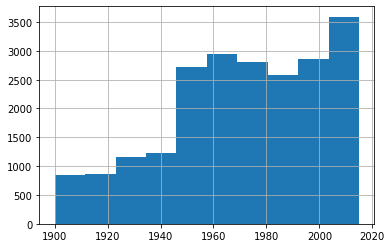

In [0]:
# 
year_built.hist()

<img src="https://github.com/jigsawlabs-student/feature-engineering/blob/master/6-datetimes-lab/year-built.png?raw=1" width="50%">

The values there seem to make sense.  Let's double check by seeing if there are any values below 1900.  

> Use pandas to select all years below 1900.

In [0]:
year_built[year_built < 1900]

# Series([], Name: yr_built, dtype: int64)

Series([], Name: yr_built, dtype: int64)

So there are no values less than 1900.  Let's see if the number `1900` values is perhaps a placeholder for missing values.

Check the percentage of values that equal 1900.

In [0]:
(year_built == 1900).sum()/ len(year_built)
# 0.00402

0.0040257276387025125

In [0]:
# Another way to get the answer
year_built.value_counts(normalize=True).loc[1900]

0.0040257276387025125

With only half a percent of the data, it seems fine.

Ok, now that we've checked the data in our column, we are good to use it.  When we have multiple date columns, one feature we can add is the difference between dates.  Here, we can calculate the difference between the year built and the year sold.

In [0]:
sale_year = df['sale_Year']

In [0]:
sale_age = sale_year - year_built

In [0]:
sale_age

0        59
1        63
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Length: 21611, dtype: int64

Then add this to the dataframe as `age_at_sale`.

In [0]:
df['age_at_sale'] = sale_age

In [0]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_Year,sale_Month,sale_Week,sale_Day,sale_Dayofweek,sale_Dayofyear,sale_Is_month_end,sale_Is_month_start,sale_Is_quarter_end,sale_Is_quarter_start,sale_Is_year_end,sale_Is_year_start,sale_Elapsed,age_at_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,42,13,0,286,False,False,False,False,False,False,1413158400,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,50,9,1,343,False,False,False,False,False,False,1418083200,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,9,25,2,56,False,False,False,False,False,False,1424822400,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,50,9,1,343,False,False,False,False,False,False,1418083200,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,8,18,2,49,False,False,False,False,False,False,1424217600,28


In [0]:
df.dtypes['age_at_sale']
# dtype('int64')

dtype('int64')

## Conclusion
In this lab we worked with the Pandas data type Datetime. To begin, we made sure that all of our time columns were properly converted to datetime. We then used Matplotlib to visualize the data in each of the columns. Finally, we practiced different types of transformations that can be applied to these types of variables.